# Ejercicios Pair Programming - Módulo 2 Sprint 1
## Lección 1 - Estadística I
### Noemi Azorin y Silvia Gordón

 En estas lecciones de estadística vamos a darle un giro de tuerca a la forma en la que se ha resuelto los ejercicios de la Pair de hasta ahora! Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De esta forma vamos a estudiar los diferentes estadísiticos que contiene en dataset seleccionado Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Los objetivos de hoy son:

1 - Buscar un conjunto de datos a analizar:
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas. Ya que también se analizarán.

In [4]:
#nuestro dataseet elegido proviene de kaggle y muestra las 1000 cuentas de Instagram con más followers e interacciones.

instagram = pd.read_csv("./Datasets/instagram_global_top_1000.csv")
instagram.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803


Procedemos a analizar y limpiar un poco nuestro DF.

In [5]:
instagram.drop(columns= ["Engagement avg", "Scraped"], inplace= True)

In [6]:
columnas_nuevas = {col:col.lower().replace(" ","_") for col in instagram.columns}

In [7]:
instagram.rename(columns= columnas_nuevas, inplace= True)

In [8]:
instagram.columns

Index(['country', 'rank', 'account', 'title', 'link', 'category', 'followers',
       'audience_country', 'authentic_engagement'],
      dtype='object')

In [9]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               1000 non-null   object 
 1   rank                  1000 non-null   int64  
 2   account               1000 non-null   object 
 3   title                 983 non-null    object 
 4   link                  1000 non-null   object 
 5   category              909 non-null    object 
 6   followers             1000 non-null   float64
 7   audience_country      993 non-null    object 
 8   authentic_engagement  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [10]:
instagram.isnull().sum()

country                  0
rank                     0
account                  0
title                   17
link                     0
category                91
followers                0
audience_country         7
authentic_engagement     0
dtype: int64

In [11]:
instagram.duplicated().sum()

0

In [12]:
instagram.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1000.0,500.5,2.888194e+02,1.0,250.75,500.5,750.25,1000.0
followers,1000.0,24836100.0,3.872143e+07,2800000.0,9000000.00,14400000.0,25650000.00,469600000.0
authentic_engagement,1000.0,649122.8,1.098804e+06,0.0,209100.00,363700.0,683250.00,13400000.0


In [13]:
instagram.describe(include="object").T

,count,unique,top,freq
country,1000,1,All,1000
account,1000,1000,cristiano,1
title,983,982,НАСТЯ ИВЛЕЕВА,2
link,1000,1000,https://www.instagram.com/cristiano/,1
category,909,165,Music,170
audience_country,993,31,United States,283


2 - Extraer los siguentes estadísiticos del conjunto de datos para varias de las variables disponibles:
- Media
- Desviación con respecto de la media
- Varianza
- Desviación típica
- Moda
- Mediana
- Media ponderada
- Robustez
- Coeficiente de variación

Para la columna "followers":

Calculamos la media.

In [14]:
media_f = instagram["followers"].mean()
media_f

24836100.0

Calculamos la desviación con respecto a la media. 

Observamos que los primeros 5 instagramers tienen un valor muy alto respecto a la media, por lo tanto la desviación es alta. Por otro lado, los últimos 5 presentan un valor más bajo respecto a la media, lo que significa que se encuentran mucho más cerca de la media. En conclusión, en este ejemplo, vemos que los valores más cercanos a la media coinciden con los valores más bajos de nuestra columna "followers".

In [15]:
dif_f = instagram["followers"] - media_f
dif_f

0      375263900.0
1      283963900.0
2      281463900.0
3      192963900.0
4      270963900.0
          ...     
995    -17136100.0
996    -13336100.0
997    -14736100.0
998    -11136100.0
999    -18636100.0
Name: followers, Length: 1000, dtype: float64

In [16]:
desviacion_f = np.abs(dif_f)
desviacion_f

0      375263900.0
1      283963900.0
2      281463900.0
3      192963900.0
4      270963900.0
          ...     
995     17136100.0
996     13336100.0
997     14736100.0
998     11136100.0
999     18636100.0
Name: followers, Length: 1000, dtype: float64

Calculamos la varianza y vemos que la desviación de todo el conjunto de datos respecto a la media es alta.

In [17]:
varianza_f = instagram["followers"].var()
varianza_f

1499349496286285.5

Ahora observamos la desviación estándar de los followers y apreciamos que puede variar la media al alza si sumamos este parámetro a la propia media o a la baja si lo restamos.

In [18]:
std_f = instagram["followers"].std()
std_f

38721434.584559046

La información que nos da la moda es que el valor que más se repite entre los followers es el indicado abajo.

In [19]:
moda_f = instagram["followers"].mode()[0]
moda_f

7800000.0

Ahora observamos el valor que ocupa la posición central de nuestra columna. Se puede apreciar que la mediana nos muestra un valor más fiable que la media, ya que considera los valores centrales de nuestra columna.

In [20]:
mediana_f = instagram["followers"].median()
mediana_f

14400000.0

La media ponderada nos aparece igual que la media porque, para este caso, no hemos tenido que incluirle ningún peso adicional.

In [21]:
media_pond_f = np.average(instagram["followers"])
media_pond_f

24836100.0

Ahora observamos nuestro punto de ruptura dela varianza para conocer la robustez de nuestros datos, en este caso vemos que es alto.

In [22]:
#calculamos punto de ruptura de la varianza:
n_f = instagram["followers"].mean()
punto_ruptura_f = 1/n_f
punto_ruptura_f

4.026397059119588e-08

Por último observamos el coeficiente de variación que nos muestra la relación entre la desviación típica y la media. Vemos que los datos son homogéneos, ya que el valor es bajo.

In [23]:
coeficiente_var_f = (media_f / std_f)
coeficiente_var_f

0.6414044383031174

Creamos un gráfico para la columna "followers", donde apreciamos la heterogeneidad de nuestros datos.

<AxesSubplot: >

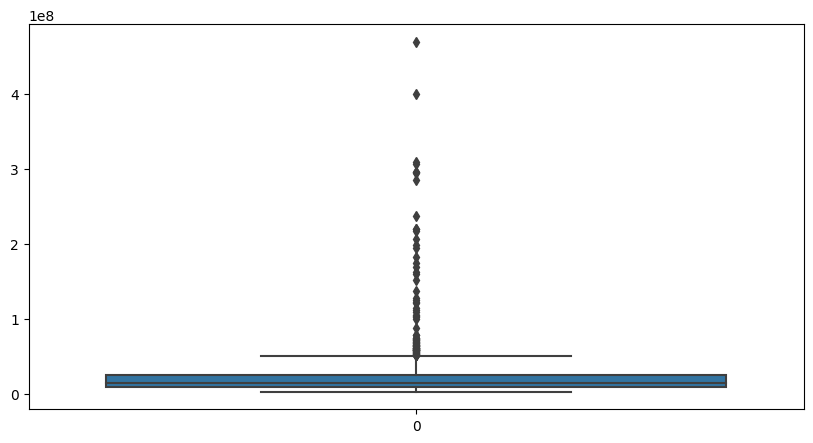

In [24]:
fig = plt.figure(figsize = (10,5))

sns.boxplot(instagram["followers"])

Para la columna "authentic_engagement":

Calculamos la media.

In [25]:
media_a = instagram["authentic_engagement"].mean()
media_a

649122.8

Calculamos la desviación con respecto a la media. 

Observamos que los dos primeros valores están más cerca de la media que el resto de datos en este ejemplo. Todo esto quiere decir que la media no nos ayuda en nuestro análisis ya que hay mucho margen entre los dos primeros registros y el resto.

In [26]:
dif_a = instagram["authentic_engagement"] - media_a
dif_a

0      7150877.2
1      5550877.2
2      4150877.2
3      2750877.2
4      2050877.2
         ...    
995    -402522.8
996    -502622.8
997    -472622.8
998    -502722.8
999    -343522.8
Name: authentic_engagement, Length: 1000, dtype: float64

In [27]:
desviacion_a = np.abs(dif_a)
desviacion_a

0      7150877.2
1      5550877.2
2      4150877.2
3      2750877.2
4      2050877.2
         ...    
995     402522.8
996     502622.8
997     472622.8
998     502722.8
999     343522.8
Name: authentic_engagement, Length: 1000, dtype: float64

Calculamos la varianza y vemos que la desviación de todo el conjunto de datos respecto a la media es muy alta.

In [28]:
varianza_a = instagram["authentic_engagement"].var()
varianza_a

1207369145805.9666

Ahora observamos la desviación estándar del engagement y apreciamos que puede variar la media al alza si sumamos este parámetro a la propia media o a la baja si lo restamos.

In [29]:
std_a = instagram["authentic_engagement"].std()
std_a

1098803.5064587146

La información que nos da la moda es que el valor que más se repite entre la interacción es el indicado abajo.

In [30]:
moda_a = instagram["authentic_engagement"].mode()[0]
moda_a

1100000.0

Ahora observamos el valor que ocupa la posición central de nuestra columna. Se puede apreciar que la mediana nos muestra un valor más fiable que la media, ya que considera los valores centrales de nuestra columna.

In [31]:
mediana_a = instagram["authentic_engagement"].median()
mediana_a

363700.0

La media ponderada nos aparece igual que la media porque, para este caso, no hemos tenido que incluirle ningún peso adicional.

In [32]:
media_pond_a = np.average(instagram["authentic_engagement"])
media_pond_a

649122.8

Ahora observamos nuestro punto de ruptura dela varianza para conocer la robustez de nuestros datos, en este caso vemos que es más bajo que para los followers.

In [33]:

n_a = instagram["authentic_engagement"].mean()
punto_ruptura_a = 1/n_a
punto_ruptura_a

1.540540557195033e-06

Por último observamos el coeficiente de variación que nos muestra la relación entre la desviación típica y la media. Vemos que los datos son homogéneos, ya que el valor es bajo.

In [34]:
coeficiente_var_a = (media_a/std_a)
coeficiente_var_a

0.5907542123632544

Creamos un gráfico para la columna "authentic_engagement", donde apreciamos la heterogeneidad de nuestros datos (por ejemplo, la cantidad de outliers que aparecen).

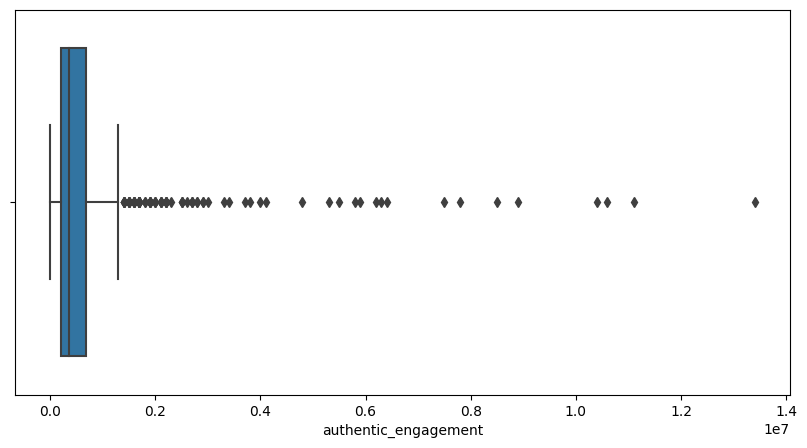

In [37]:
fig = plt.figure(figsize = (10,5))

sns.boxplot( x = instagram["authentic_engagement"])

plt.show()

3 - Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

- Vamos interpretando nuestros resultados a medida que resolvemos los ejercicios.

In [36]:
#guardamos el fichero con los cambios realizados al inicio de este jupyter.
instagram.to_csv("./Datasets/instagram_gloabal2.csv")